Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_hist.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

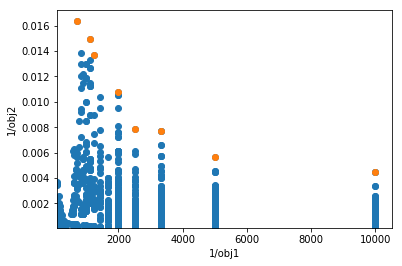

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


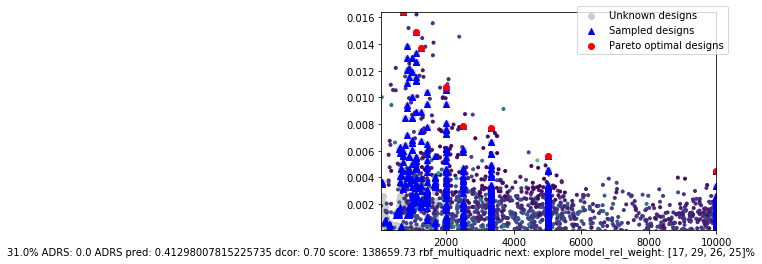

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 686, 1343, 1047,  674,  772, 2252, 2251,  217, 2033, 2076, 1950,
       1982, 2227, 1886, 2238, 2128, 2038, 2212, 2028, 2211, 2168, 2166,
       2210, 2123, 2124, 2171, 2165, 1910, 1953, 1825, 1909, 1786, 1866,
        218,   57,   13,  219, 1258,  220,  453,  222,  165,  182,  166,
          3,  168,  111,  785,  204,  167,  164,  112,  113,   12,  940,
        114,   59,  183,  115,   61,    0,  279,  221,  169,  590,  181,
        117,  280,   60, 1765,   67, 1762, 1792,  170,  585, 1413,  178,
       1099,  171, 1225, 1648,  172, 1181,  116,  179,  175,  118,  287,
        122,  120,  119,  281, 1136,  282, 1569, 1100,  223,  138,  121,
        173,  283,  315,  309,  250,    1,  180, 1270, 2055, 1234, 2191,
        225,  212, 1994, 2148,  455,  174,  224,  290,   62,  395,  258,
        586,   63,   11,    4,   25,    5, 1126,    7, 1265,    6,   64,
        226, 1203, 1842,  249, 1098, 1445, 1085, 1785, 1135, 1241, 1220,
        493,   27, 1113,  441,  470,  350,  227,  4